In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2


print("Done with library declaration, Current version of Tensorflow is: ", tf.__version__)

Done with library declaration, Current version of Tensorflow is:  2.17.0


In [5]:
!git clone https://github.com/COSMIC-ATOM97/Garbage-Segregation-Dataset.git

Cloning into 'Garbage-Segregation-Dataset'...
remote: Enumerating objects: 5083, done.
remote: Total 5083 (delta 0), reused 0 (delta 0), pack-reused 5083 (from 1)
Receiving objects: 100% (5083/5083), 41.57 MiB | 39.49 MiB/s, done.
Resolving deltas: 100% (2148/2148), done.


In [6]:
# collect directory
data_dir = Path('/content/Garbage/original_images')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# display class names
print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [7]:
PATH_TEST = r"/content/Garbage/original_images"
PATH_TRAIN = r"/content/Garbage/processed_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [8]:
imagepath_cardboard = r"/content/Garbage/original_images/cardboard"
graypath_cardboard = r"/content/Garbage/processed_images/cardboard"
File_listing = os.listdir(imagepath_cardboard)
for file in File_listing:
    im = Image.open(imagepath_cardboard + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_cardboard + '\\' + file, "JPEG")

In [9]:
imagepath_glass = r"/content/Garbage/original_images/glass"
graypath_glass = r"/content/Garbage/processed_images/glass"
File_listing = os.listdir(imagepath_glass)
for file in File_listing:
    im = Image.open(imagepath_glass + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_glass + '\\' + file, "JPEG")

In [10]:
imagepath_metal = r"/content/Garbage/original_images/metal"
graypath_metal = r"/content/Garbage/processed_images/metal"
File_listing = os.listdir(imagepath_metal)
for file in File_listing:
    im = Image.open(imagepath_metal + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_metal + '\\' + file, "JPEG")

In [11]:
imagepath_paper = r"/content/Garbage/original_images/paper"
graypath_paper = r"/content/Garbage/processed_images/paper"
File_listing = os.listdir(imagepath_paper)
for file in File_listing:
    im = Image.open(imagepath_paper + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_paper + '\\' + file, "JPEG")

In [12]:
imagepath_plastic = r"/content/Garbage/original_images/plastic"
graypath_plastic = r"/content/Garbage/processed_images/plastic"
File_listing = os.listdir(imagepath_plastic)
for file in File_listing:
    im = Image.open(imagepath_plastic + '//' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_plastic + '\\' + file, "JPEG")

In [13]:
imagepath_trash = r"/content/Garbage/original_images/trash"
graypath_trash = r"/content/Garbage/processed_images/trash"
File_listing = os.listdir(imagepath_trash)
for file in File_listing:
    im = Image.open(imagepath_trash + '//' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_trash + '\\' + file, "JPEG")

In [14]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

In [15]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)

In [16]:
len(os.listdir(PATH_TRAIN))

2533

In [17]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [18]:
image_gen = ImageDataGenerator(rescale=1./255)

In [19]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir,
    shuffle=True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [20]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir,
    shuffle=True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [21]:
sample_data_gen = image_gen.flow_from_directory(
    directory = test_dir,
    shuffle=True,
    target_size = (200, 200),
    class_mode='categorical')

sample_training_images, _= next(sample_data_gen)


Found 2527 images belonging to 6 classes.


In [22]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(6, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
batch_size = 45
epochs = 60
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,878 (187.02 KB)

 Trainable params: 47,878 (187.02 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
num_cardboard_train = len(os.listdir(imagepath_cardboard_dir))
num_glass_train = len(os.listdir(imagepath_glass_dir))
num_metal_train = len(os.listdir(imagepath_metal_dir))
num_paper_train = len(os.listdir(imagepath_cardboard_dir))
num_plastic_train = len(os.listdir(imagepath_glass_dir))
num_trash_train = len(os.listdir(imagepath_trash_dir))

num_cardboard_test = len(os.listdir(graypath_cardboard))
num_glass_test = len(os.listdir(graypath_glass))
num_metal_test = len(os.listdir(graypath_metal))
num_paper_test = len(os.listdir(graypath_paper))
num_plastic_test = len(os.listdir(graypath_plastic))
num_trash_test = len(os.listdir(graypath_trash))

total_train = num_cardboard_train + num_glass_train + num_metal_train + num_paper_train + num_plastic_train + num_trash_train
total_test = num_cardboard_test + num_glass_test + num_metal_test + num_paper_test + num_plastic_test + num_trash_test

In [25]:
history = model.fit(
    train_data_gen,
    validation_data = train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs = epochs,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=7)]
)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.2197 - loss: 1.7581 - val_accuracy: 0.2455 - val_loss: 1.7153
Epoch 2/60
27/52 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.2389 - loss: 1.7124

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2394 - loss: 1.7130 - val_accuracy: 0.2381 - val_loss: 1.6654
Epoch 3/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.2963 - loss: 1.6346 - val_accuracy: 0.3387 - val_loss: 1.5815
Epoch 4/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2728 - loss: 1.6516 - val_accuracy: 0.2803 - val_loss: 1.6058
Epoch 5/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.3314 - loss: 1.5621 - val_accuracy: 0.3823 - val_loss: 1.5107
Epoch 6/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3806 - loss: 1.4930 - val_accuracy: 0.4585 - val_loss: 1.3864
Epoch 7/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.4045 - loss: 1.4507 - val_accuracy: 0.4615 - val_loss: 1.3848
Epoch 8/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.4668 - loss: 1.3753 - val_accuracy: 0.4190 - val_loss: 1.4477
Epoch 9/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.4210 - loss: 1.4161 - val_accuracy: 0.4436 - val_loss: 1

In [26]:
test_loss, test_acc = model.evaluate(test_data_gen)
print('Test accuracy: {} Test Loss: {} '.format(test_acc*100, test_loss))

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8146 - loss: 0.5475
Test accuracy: 81.3217282295227 Test Loss: 0.5475949048995972 


In [27]:
model.save('my_trained_model.h5')  # Save as .h5 file (can use .keras format as well in newer versions)

print("Model saved successfully.")

Model saved successfully.


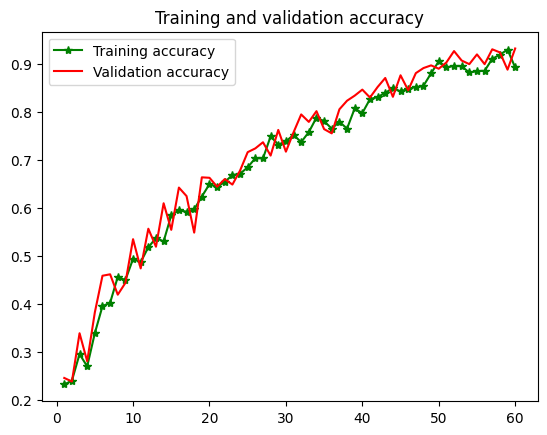

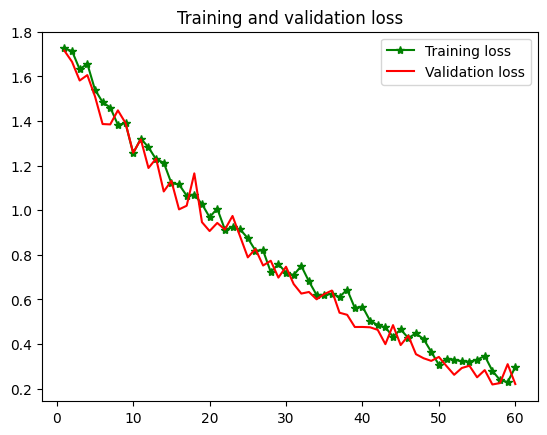

In [28]:
train_acc = history.history['accuracy'] # store training accuracy in history
val_acc = history.history['val_accuracy'] # store validation accuracy in history
train_loss = history.history['loss'] # store training loss in history
val_loss = history.history['val_loss'] # store validation loss in history

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'g*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
from skimage.transform import resize

In [30]:
import keras.utils as ku
import numpy as np
number_to_class = ['cardboard',\
                   'glass',\
                   'metal',
                   'paper',\
                   'plastic',\
                   'trash',]

1/1 ━━━━━━━━━━━━━━━━━━━━ 53s 53s/step
Probability: 0.7818524
Classified: metal 



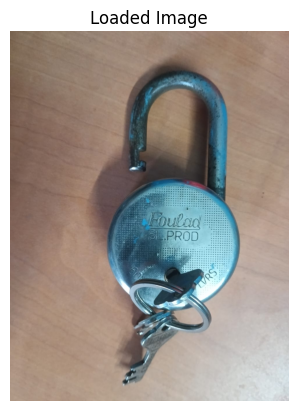

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
import tensorflow as tf

# Load the original color image (RGB)
test_img = '/content/d2f01121-0baa-4bcc-96e5-c30d72c2155e.jpg'
img = ku.load_img(test_img, target_size=(32, 32))  # Load image in RGB format (default)

# Convert the image to array and normalize to [0, 1]
img = ku.img_to_array(img, dtype=np.uint8)  # Image shape becomes (32, 32, 3)
img = np.array(img) / 255.0  # Normalize the image

# Expand dimensions to match the model's expected input: (batch_size, 32, 32, 3)
img = np.expand_dims(img, axis=0)  # Shape becomes (1, 32, 32, 3)

# Assuming your model is already defined and loaded as 'model'
# Example: model = tf.keras.models.load_model('your_model.h5')

# Make prediction
prediction = model.predict(img)

# Display results
print("Probability:", np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:", predicted_class, '\n')

# Show the original image (in color)
plt.axis('off')
original_image = ku.load_img(test_img)  # Load original image for display
plt.imshow(original_image)
plt.title("Loaded Image")
plt.show()
